### Model Selection And Training 

In [58]:
import pandas as pd 
import numpy as np 
import pickle
import joblib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,root_mean_squared_error




In [2]:
df = pd.read_csv(r"C:\Users\chava\OneDrive\Desktop\Behavioral_Data_Analyst\Flight_Price_cleaned_data_3.csv")
df.head()

,Flight_Date,Airline_Name,Flight_Number,Travel_Class,Origin_City,Departure_Time,Destination_City,Arrival_Time,Ticket_Price,Num_Stops,Date,Month,Year,duration_minutes,Departure_Hour
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,6013,0,26,6,2023,130,18
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,6013,0,26,6,2023,140,6
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,6016,0,26,6,2023,130,4
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,6015,0,26,6,2023,135,10
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,6015,0,26,6,2023,140,8


In [3]:
df.dtypes

Flight_Date         object
Airline_Name        object
Flight_Number       object
Travel_Class        object
Origin_City         object
Departure_Time      object
Destination_City    object
Arrival_Time        object
Ticket_Price         int64
Num_Stops            int64
Date                 int64
Month                int64
Year                 int64
duration_minutes     int64
Departure_Hour       int64
dtype: object

In [4]:
df['Airline_Name'].value_counts()

Airline_Name
Vistara      127859
Air India     80894
Indigo        43120
GO FIRST      23177
AirAsia       16098
SpiceJet       9011
StarAir          61
Trujet           41
Name: count, dtype: int64

In [5]:
df['Origin_City'].value_counts()

Origin_City
Delhi        61345
Mumbai       60903
Bangalore    52106
Kolkata      46347
Hyderabad    40860
Chennai      38700
Name: count, dtype: int64

In [6]:
df['Destination_City'].value_counts()

Destination_City
Mumbai       59109
Delhi        57361
Bangalore    51112
Kolkata      49535
Hyderabad    42776
Chennai      40368
Name: count, dtype: int64

In [7]:
df['Departure_Time'].value_counts()

Departure_Time
07:00    8760
10:25    7693
19:00    5738
09:45    5468
08:30    4955
         ... 
22:05      18
03:30      18
00:15      15
00:45      12
04:15       5
Name: count, Length: 251, dtype: int64

In [8]:
df['Arrival_Time'].value_counts()

Arrival_Time
19:55    9194
20:55    6363
22:45    5282
09:40    5185
08:50    5125
         ... 
06:20      20
03:45      18
05:45      15
05:20       5
04:50       5
Name: count, Length: 266, dtype: int64

In [9]:
df['Num_Stops'].value_counts()

Num_Stops
1    250929
0     36044
2     13288
Name: count, dtype: int64

In [10]:
df['Travel_Class'].value_counts()

Travel_Class
economy     206774
business     93487
Name: count, dtype: int64

In [12]:
df['duration_minutes'].min()

np.int64(50)

In [13]:
df['duration_minutes'].max()

np.int64(2990)

In [14]:
df['duration_minutes'].median()

np.float64(675.0)

### Preprocessing

In [26]:
df

,Flight_Date,Travel_Class,Origin_City,Departure_Time,Destination_City,Arrival_Time,Ticket_Price,Num_Stops,Date,Month,...,duration_minutes,Departure_Hour,Airline_Name_Air India,Airline_Name_AirAsia,Airline_Name_GO FIRST,Airline_Name_Indigo,Airline_Name_SpiceJet,Airline_Name_StarAir,Airline_Name_Trujet,Airline_Name_Vistara
0,2023-06-26,0,Delhi,18:55,Mumbai,21:05,6013,0,26,6,...,130,18,False,False,False,False,True,False,False,False
1,2023-06-26,0,Delhi,06:20,Mumbai,08:40,6013,0,26,6,...,140,6,False,False,False,False,True,False,False,False
2,2023-06-26,0,Delhi,04:25,Mumbai,06:35,6016,0,26,6,...,130,4,False,True,False,False,False,False,False,False
3,2023-06-26,0,Delhi,10:20,Mumbai,12:35,6015,0,26,6,...,135,10,False,False,False,False,False,False,False,True
4,2023-06-26,0,Delhi,08:50,Mumbai,11:10,6015,0,26,6,...,140,8,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2023-08-13,1,Chennai,09:45,Hyderabad,19:50,70304,1,13,8,...,605,9,False,False,False,False,False,False,False,True
300257,2023-08-13,1,Chennai,12:30,Hyderabad,22:55,78262,1,13,8,...,625,12,False,False,False,False,False,False,False,True
300258,2023-08-13,1,Chennai,07:05,Hyderabad,20:55,80285,1,13,8,...,830,7,False,False,False,False,False,False,False,True
300259,2023-08-13,1,Chennai,07:00,Hyderabad,17:00,82809,1,13,8,...,600,7,False,False,False,False,False,False,False,True


In [ ]:
df = df.drop('Flight_Number',axis=1)


df['Travel_Class'] = df['Travel_Class'].apply(lambda x:1 if x == 'business' else 0)

In [43]:
df = df.drop('Flight_Date',axis=1)

In [33]:
df=df.join(pd.get_dummies(df.Airline_Name,prefix='Airline_Name')).drop('Airline_Name',axis=1)
df=df.join(pd.get_dummies(df.Origin_City,prefix='Origin_City')).drop('Origin_City',axis=1)
df=df.join(pd.get_dummies(df.Destination_City,prefix='Destination_City')).drop('Destination_City',axis=1)
df=df.join(pd.get_dummies(df.Arrival_Time,prefix='Arrival_Time')).drop('Arrival_Time',axis=1)
df=df.join(pd.get_dummies(df.Departure_Time,prefix='Departure_Time')).drop('Departure_Time',axis=1)

AttributeError: 'DataFrame' object has no attribute 'Airline_Name'

In [34]:
df

,Flight_Date,Travel_Class,Ticket_Price,Num_Stops,Date,Month,Year,duration_minutes,Departure_Hour,Airline_Name_Air India,...,Departure_Time_23:10,Departure_Time_23:15,Departure_Time_23:20,Departure_Time_23:25,Departure_Time_23:30,Departure_Time_23:35,Departure_Time_23:40,Departure_Time_23:45,Departure_Time_23:50,Departure_Time_23:55
0,2023-06-26,0,6013,0,26,6,2023,130,18,False,...,False,False,False,False,False,False,False,False,False,False
1,2023-06-26,0,6013,0,26,6,2023,140,6,False,...,False,False,False,False,False,False,False,False,False,False
2,2023-06-26,0,6016,0,26,6,2023,130,4,False,...,False,False,False,False,False,False,False,False,False,False
3,2023-06-26,0,6015,0,26,6,2023,135,10,False,...,False,False,False,False,False,False,False,False,False,False
4,2023-06-26,0,6015,0,26,6,2023,140,8,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2023-08-13,1,70304,1,13,8,2023,605,9,False,...,False,False,False,False,False,False,False,False,False,False
300257,2023-08-13,1,78262,1,13,8,2023,625,12,False,...,False,False,False,False,False,False,False,False,False,False
300258,2023-08-13,1,80285,1,13,8,2023,830,7,False,...,False,False,False,False,False,False,False,False,False,False
300259,2023-08-13,1,82809,1,13,8,2023,600,7,False,...,False,False,False,False,False,False,False,False,False,False


In [31]:
df.head()

,Flight_Date,Travel_Class,Ticket_Price,Num_Stops,Date,Month,Year,duration_minutes,Departure_Hour,Airline_Name_Air India,...,Departure_Time_23:10,Departure_Time_23:15,Departure_Time_23:20,Departure_Time_23:25,Departure_Time_23:30,Departure_Time_23:35,Departure_Time_23:40,Departure_Time_23:45,Departure_Time_23:50,Departure_Time_23:55
0,2023-06-26,0,6013,0,26,6,2023,130,18,False,...,False,False,False,False,False,False,False,False,False,False
1,2023-06-26,0,6013,0,26,6,2023,140,6,False,...,False,False,False,False,False,False,False,False,False,False
2,2023-06-26,0,6016,0,26,6,2023,130,4,False,...,False,False,False,False,False,False,False,False,False,False
3,2023-06-26,0,6015,0,26,6,2023,135,10,False,...,False,False,False,False,False,False,False,False,False,False
4,2023-06-26,0,6015,0,26,6,2023,140,8,False,...,False,False,False,False,False,False,False,False,False,False


### Training Regression Model

In [44]:
x,y = df.drop('Ticket_Price', axis=1),df.Ticket_Price

In [63]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [64]:
reg = RandomForestRegressor(n_estimators=50, max_depth=15, random_state=42, n_jobs=-1)

reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, n_estimators=50, n_jobs=-1, random_state=42)

In [65]:
reg.score(X_test,y_test)

0.9735945727459726

In [66]:
y_pred = reg.predict(X_test)

In [70]:
metrics_evaluation = {
    
    'R2:':r2_score(y_test,y_pred),
    'MAE': mean_absolute_error(y_test,y_pred),
    'MSE:':mean_squared_error(y_test,y_pred),
    'RMSE:': root_mean_squared_error(y_test,y_pred)
}



In [71]:
# Display model performance
print(pd.DataFrame([metrics_evaluation]))

        R2:          MAE          MSE:        RMSE:
0  0.973595  1962.628812  1.401174e+07  3743.225506


In [72]:
#Save the Trained Model and Feature Names
joblib.dump(reg, "Flight_Price_RFR.pkl")
joblib.dump(list(x.columns), "Feature_RFR.pkl")

['Feature_RFR.pkl']

In [57]:
importances = dict(zip(reg.feature_names_in_,reg.feature_importances_))
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse=True)

sorted_importances

[('Travel_Class', np.float64(0.8801903249123776)),
 ('duration_minutes', np.float64(0.04293802883444732)),
 ('Month', np.float64(0.009763878295312159)),
 ('Date', np.float64(0.007679462749633985)),
 ('Airline_Name_Air India', np.float64(0.00526625001293671)),
 ('Airline_Name_Vistara', np.float64(0.00463036214915076)),
 ('Origin_City_Delhi', np.float64(0.0030316217891244463)),
 ('Departure_Hour', np.float64(0.0027956114758072212)),
 ('Destination_City_Delhi', np.float64(0.0020304561271983373)),
 ('Num_Stops', np.float64(0.0018291876375116191)),
 ('Destination_City_Mumbai', np.float64(0.0015328252629175868)),
 ('Origin_City_Kolkata', np.float64(0.0014263023982965387)),
 ('Destination_City_Kolkata', np.float64(0.0013537297436204449)),
 ('Arrival_Time_07:50', np.float64(0.0013259551695713964)),
 ('Origin_City_Mumbai', np.float64(0.0011527965483197514)),
 ('Origin_City_Hyderabad', np.float64(0.0011300145896302918)),
 ('Origin_City_Bangalore', np.float64(0.0011012440820283619)),
 ('Arrival_T

<BarContainer object of 5 artists>

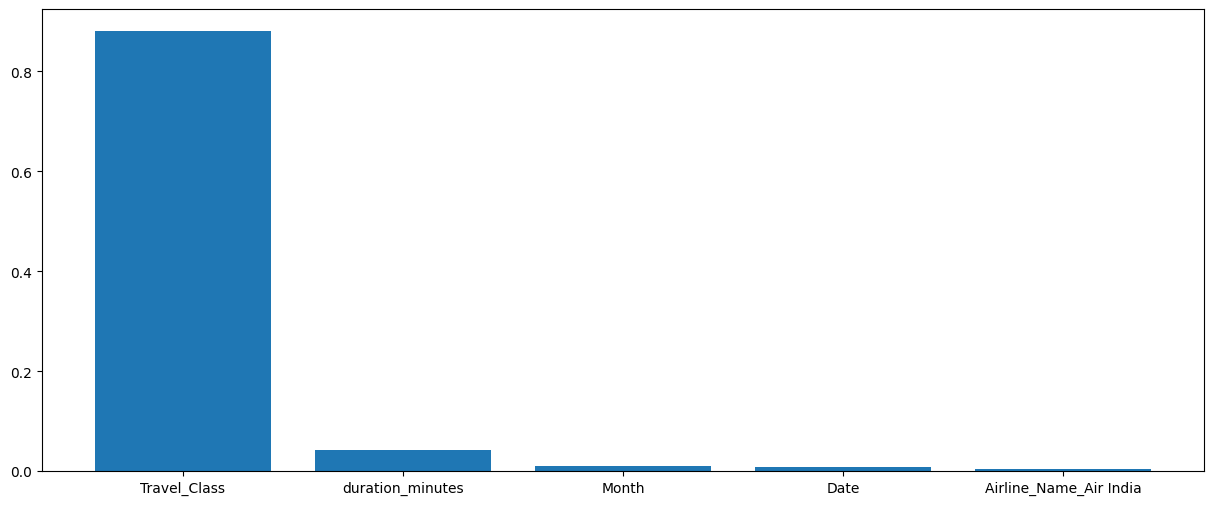

In [62]:
plt.figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])